In [1]:
from env import GridWorld
from agent import TD, q_learning_update, sarsa_update
import matplotlib.pyplot as plt

In [2]:
env = GridWorld(
    size=5,
    traps=[(0, 4), (1, 3), (2, 2)])
env.render()


Grid World:
A: Agent, G: Goal, T: Trap, .: Empty
A . . . T
. . . T .
. . T . .
. . . . .
. . . . G



In [3]:
agent = TD()

In [4]:
# SARSA
agent = TD()
final_steps_S = []
episode_rewards_S = []

for episode in range(100):
    state = env.reset()
    action = agent.choose_action(state)
    episode_reward = 0  # 각 에피소드마다 초기화

    for step in range(50):
        if step % 10 == 0: # visualizing frequency
            pass # breakpoint here to visualize q_table
        next_state, reward, done = env.step(action)
        next_action = agent.choose_action(next_state)
        sarsa_update(agent, state, action, reward, next_state, next_action)

        state = next_state
        action = next_action  # 선택한 action 사용

        episode_reward += reward
    
        if done:
            print(f"Episode {episode+1} 종료 step: {step+1}, 보상: {episode_reward:.2f}")
            final_steps_S.append(step+1)
            episode_rewards_S.append(round(episode_reward,2))
            break

print("학습 완료")

Episode 1 종료 step: 37, 보상: -8.60
Episode 2 종료 step: 15, 보상: -6.40
Episode 3 종료 step: 10, 보상: -5.90
Episode 4 종료 step: 14, 보상: -6.30
Episode 5 종료 step: 14, 보상: -6.30
Episode 7 종료 step: 43, 보상: -9.20
Episode 10 종료 step: 15, 보상: 8.60
Episode 12 종료 step: 40, 보상: -8.90
Episode 14 종료 step: 33, 보상: -8.20
Episode 16 종료 step: 42, 보상: 5.90
Episode 17 종료 step: 32, 보상: -8.10
Episode 18 종료 step: 28, 보상: 7.30
Episode 20 종료 step: 20, 보상: 8.10
Episode 21 종료 step: 25, 보상: 7.60
Episode 22 종료 step: 24, 보상: 7.70
Episode 23 종료 step: 15, 보상: 8.60
Episode 24 종료 step: 21, 보상: 8.00
Episode 25 종료 step: 14, 보상: 8.70
Episode 26 종료 step: 15, 보상: 8.60
Episode 27 종료 step: 40, 보상: 6.10
Episode 28 종료 step: 10, 보상: 9.10
Episode 29 종료 step: 9, 보상: 9.20
Episode 30 종료 step: 10, 보상: 9.10
Episode 31 종료 step: 12, 보상: 8.90
Episode 32 종료 step: 11, 보상: 9.00
Episode 33 종료 step: 14, 보상: 8.70
Episode 34 종료 step: 8, 보상: -5.70
Episode 35 종료 step: 9, 보상: 9.20
Episode 36 종료 step: 10, 보상: 9.10
Episode 37 종료 step: 8, 보상: -5.70
Episode 3

In [5]:
display(agent.q_array)
display(agent.q_array.mean(axis=1).round(2).reshape(5, 5))

array([[-0.28,  0.57, -0.26, -0.26],
       [-0.25, -0.15, -0.23, -0.22],
       [-0.21, -0.19, -0.2 , -0.19],
       [-0.23, -0.5 , -0.16, -1.35],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.23,  1.24, -0.24, -0.2 ],
       [-0.19,  0.28, -0.19, -0.18],
       [-0.17, -0.5 , -0.17, -0.5 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.5 ,  0.  ,  0.  ,  0.  ],
       [-0.18,  2.1 , -0.1 , -0.17],
       [-0.14,  1.36, -0.15, -0.5 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.5 , -0.01, -0.5 , -0.01],
       [-0.01, -0.01,  0.  ,  0.  ],
       [-0.05,  3.97,  0.19,  0.66],
       [-0.09, -0.09, -0.09,  3.75],
       [-0.95,  6.  , -0.03, -0.03],
       [-0.04,  0.88, -0.01, -0.01],
       [-0.01,  1.  ,  0.  ,  0.  ],
       [-0.09, -0.02,  0.16,  5.58],
       [ 0.22,  0.7 , -0.07,  6.99],
       [-0.03, -0.05,  0.75,  7.92],
       [-0.04,  1.49,  0.52,  9.96],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

array([[-0.06, -0.21, -0.2 , -0.56,  0.  ],
       [ 0.14, -0.07, -0.34,  0.  , -0.12],
       [ 0.41,  0.14,  0.  , -0.26, -0.  ],
       [ 1.19,  0.87,  1.25,  0.2 ,  0.25],
       [ 1.41,  1.96,  2.15,  2.98,  0.  ]])

In [6]:
# Q learning
agent = TD()
final_steps_Q = []
episode_rewards_Q = []

for episode in range(100):
    env.reset()
    episode_reward = 0  # 각 에피소드마다 초기화

    for step in range(50):
        if step % 10 == 0: # visualizing frequency
            pass # breakpoint here to visualize q_table
        current_state = tuple(env.pos)
        action = agent.choose_action(current_state)
        next_state, reward, done = env.step(action)
        q_learning_update(agent, current_state, action, reward, next_state)
        episode_reward += reward
    
        if done:
            print(f"Episode {episode+1} 종료 step: {step+1}, 보상: {episode_reward:.2f}")
            final_steps_Q.append(step+1)
            episode_rewards_Q.append(round(episode_reward,2))
            break

print("학습 완료")

Episode 1 종료 step: 26, 보상: -7.50
Episode 2 종료 step: 29, 보상: -7.80
Episode 3 종료 step: 17, 보상: -6.60
Episode 4 종료 step: 6, 보상: -5.50
Episode 5 종료 step: 28, 보상: -7.70
Episode 7 종료 step: 17, 보상: -6.60
Episode 8 종료 step: 38, 보상: -8.70
Episode 11 종료 step: 26, 보상: 7.50
Episode 16 종료 step: 23, 보상: 7.80
Episode 17 종료 step: 42, 보상: 5.90
Episode 18 종료 step: 47, 보상: 5.40
Episode 19 종료 step: 17, 보상: -6.60
Episode 20 종료 step: 24, 보상: -7.30
Episode 21 종료 step: 45, 보상: 5.60
Episode 22 종료 step: 11, 보상: 9.00
Episode 23 종료 step: 8, 보상: 9.30
Episode 24 종료 step: 12, 보상: 8.90
Episode 25 종료 step: 12, 보상: 8.90
Episode 26 종료 step: 13, 보상: 8.80
Episode 27 종료 step: 16, 보상: 8.50
Episode 28 종료 step: 8, 보상: 9.30
Episode 29 종료 step: 12, 보상: 8.90
Episode 30 종료 step: 10, 보상: 9.10
Episode 31 종료 step: 12, 보상: 8.90
Episode 32 종료 step: 9, 보상: 9.20
Episode 33 종료 step: 8, 보상: 9.30
Episode 34 종료 step: 8, 보상: 9.30
Episode 35 종료 step: 9, 보상: 9.20
Episode 36 종료 step: 10, 보상: 9.10
Episode 37 종료 step: 8, 보상: 9.30
Episode 38 종료 st

In [7]:
display(agent.q_array)
display(agent.q_array.mean(axis=1).round(2).reshape(5, 5))

array([[-0.25,  2.4 , -0.12, -0.24],
       [-0.22, -0.2 , -0.2 , -0.2 ],
       [-0.17, -0.17, -0.17, -0.16],
       [-0.13, -0.5 , -0.13, -0.95],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.18,  3.43, -0.09, -0.19],
       [-0.17,  0.11, -0.16, -0.16],
       [-0.16, -0.5 , -0.15, -0.5 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.07,  4.58,  0.22, -0.12],
       [-0.13,  2.18, -0.12, -0.95],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [-0.5 , -0.01,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.14,  0.13,  0.01,  5.71],
       [-0.01,  6.81, -0.  ,  0.13],
       [-0.5 , -0.04,  1.99, -0.03],
       [-0.02,  1.74, -0.01, -0.01],
       [ 0.  ,  0.  , -0.01,  0.  ],
       [-0.09, -0.09, -0.09,  2.28],
       [ 0.08,  1.18,  0.  ,  7.79],
       [ 0.07,  2.55,  0.66,  8.82],
       [ 0.07, -0.01,  1.87,  9.96],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

array([[ 0.45, -0.2 , -0.17, -0.43,  0.  ],
       [ 0.74, -0.1 , -0.33,  0.  ,  0.  ],
       [ 1.15,  0.25,  0.  , -0.13,  0.  ],
       [ 1.5 ,  1.73,  0.36,  0.42, -0.  ],
       [ 0.5 ,  2.26,  3.02,  2.97,  0.  ]])

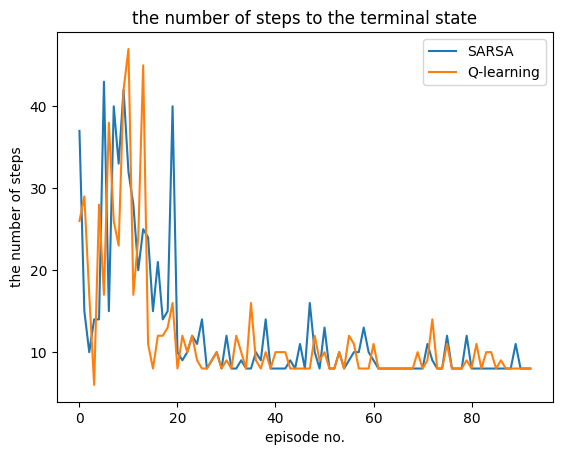

In [8]:
plt.plot(final_steps_S, label='SARSA')
plt.plot(final_steps_Q, label='Q-learning')
plt.title('the number of steps to the terminal state')
plt.xlabel('episode no.')
plt.ylabel('the number of steps')
plt.legend()
plt.show()


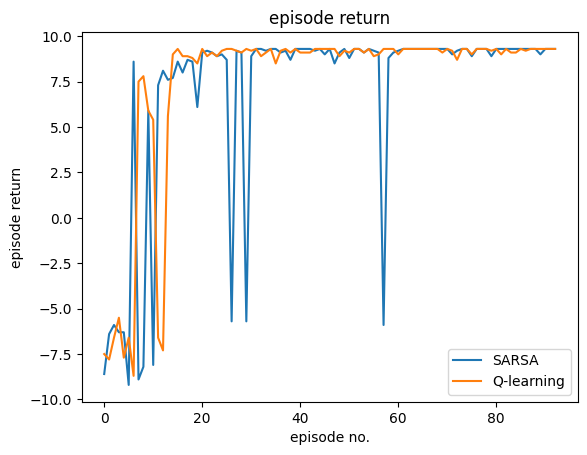

In [9]:
plt.plot(episode_rewards_S, label='SARSA')
plt.plot(episode_rewards_Q, label='Q-learning')
plt.title('episode return')
plt.xlabel('episode no.')
plt.ylabel('episode return')
plt.legend()
plt.show()
